In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
#Load data
df = pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [19]:
df.columns = ["GENDER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","FATIGUE","ALLERGY","WHEEZING","ALCOHOL CONSUMING","COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN","LUNG_CANCER"]

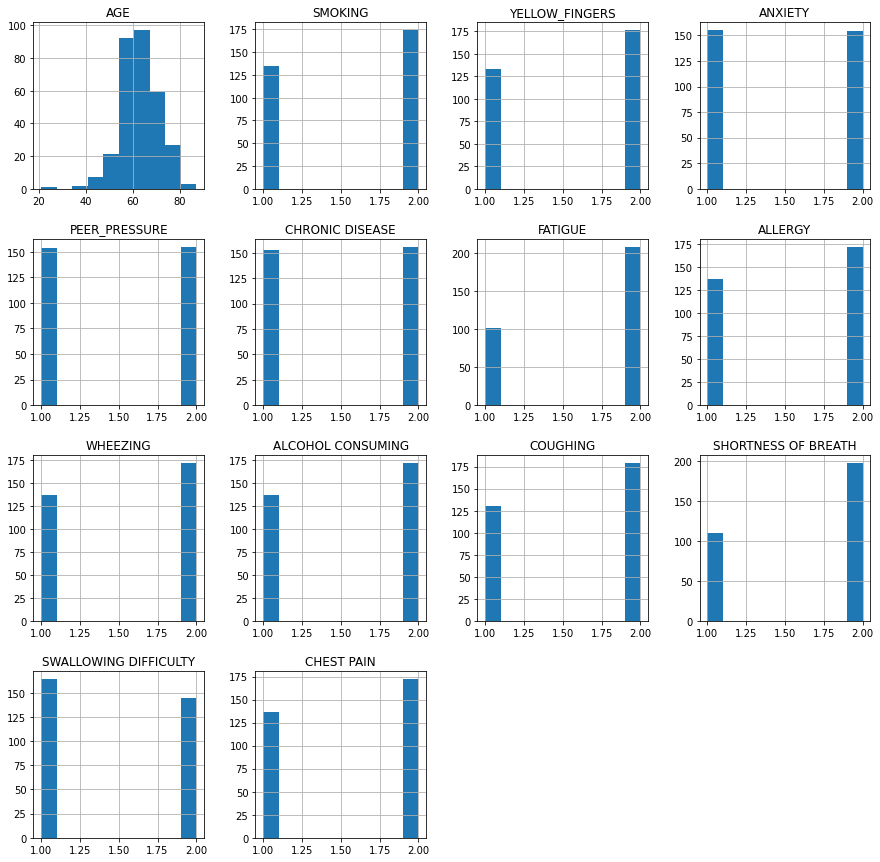

In [20]:
import matplotlib.pyplot as plt
#plots other feature sets
df.hist(figsize = (15,15))
plt.show()

In [21]:
df["GENDER"].replace(["M","F"], [0,1], inplace=True)

In [22]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [23]:
x = df[["GENDER","AGE","SMOKING","YELLOW_FINGERS","CHRONIC DISEASE","ALLERGY","WHEEZING","COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]]

y = df["LUNG_CANCER"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

print("Nnumber transactions x_train dataset: ", x_train.shape)
print("Nnumber transactions y_train dataset: ", y_train.shape)
print("Nnumber transactions x_test dataset: ", x_test.shape)
print("Nnumber transactions y_test dataset: ", y_test.shape)

Nnumber transactions x_train dataset:  (216, 11)
Nnumber transactions y_train dataset:  (216,)
Nnumber transactions x_test dataset:  (93, 11)
Nnumber transactions y_test dataset:  (93,)


In [25]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred=model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.946236559139785


In [27]:
data = {'AGE': [42.0], "GENDER" : [0],"SMOKING": [2],"YELLOW_FINGERS": [2],"CHRONIC DISEASE": [1],"ALLERGY": [1],"WHEEZING": [2],"COUGHING": [1],"SHORTNESS OF BREATH": [2],"SWALLOWING DIFFICULTY": [2],"CHEST PAIN": [2]}
data = pd.DataFrame(data)
prediction = model.predict(data)

if prediction[0] == 0:
  print("No Lung Cancer")
else:
  print("Has Lung Cancer")

Has Lung Cancer
